# Bibliotecas

In [66]:
# Tratamento do DataFrame
import pandas as pd
import numpy as np

# Tratamento de Dados
from sklearn.decomposition import PCA 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from bokeh.palettes import Category20

In [2]:
# O banco de dados abaixo são as respostas, em escala Likert de 0 a 7 pontos, dada por clientes  
# para 29 questões relacionadas à imagem de 19 marcas de alvejantes.

In [3]:
df = pd.read_csv('avaliacoes.csv')
df.head()

,respondente,marca,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,1,RiUS,7,6,7,6,7,6,7,7,...,6,7,7,6,7,7,2,7,7,7
1,1,CanX,5,1,6,5,5,5,6,6,...,2,2,7,7,6,6,6,6,6,6
2,1,Candu,5,1,4,5,4,6,1,5,...,4,5,5,5,1,5,5,1,5,4
3,2,AbraxF,6,5,5,5,6,6,5,5,...,5,3,6,6,6,5,5,6,6,6
4,2,Mundo,5,5,6,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [4]:
marcas = df.set_index('marca')

In [5]:
marcas.drop(columns='respondente', inplace = True)

In [6]:
marcas['total'] = marcas.sum(1)

In [7]:
marcas.reset_index(inplace = True)

In [8]:
avaliacoes = pd.DataFrame(marcas.groupby('marca')['total'].sum())

In [9]:
avaliacoes.reset_index(inplace = True)

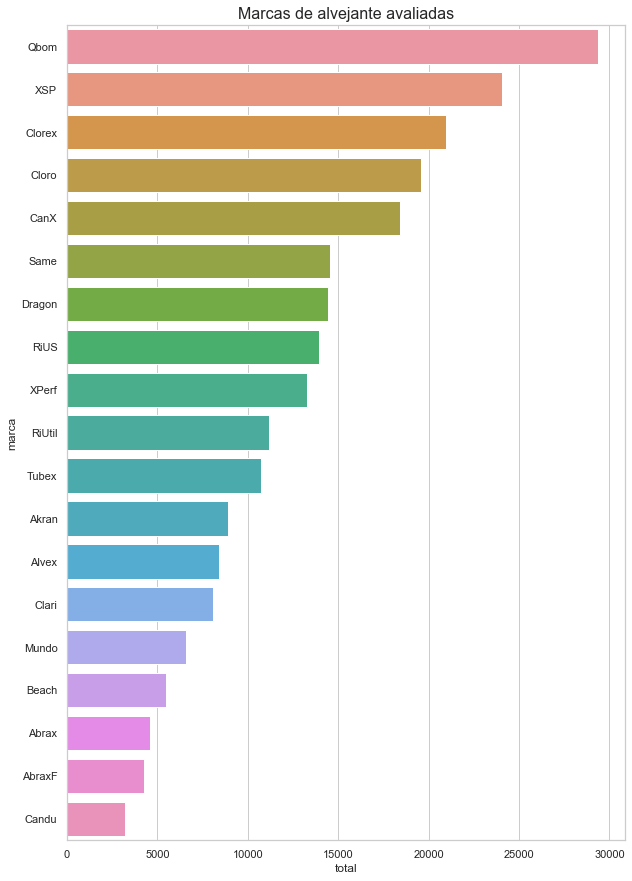

In [10]:
# O gráfico abaixo posiciona as marcas de alvejantes conforme o TOTAL da pontuação que receberam,
# assim, a marca Qbom foi a mais bem avaliada nessa pesquisa.
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y = 'marca', x='total', data=avaliacoes,
            order = avaliacoes.sort_values('total', ascending = False).marca);

plt.title('Marcas de alvejante avaliadas', fontsize = 16);

In [11]:
# DataFrame com o questionário:

In [12]:
questoes = pd.read_csv('questoes.csv')

In [13]:
questoes.head()

,numero,pergunta
0,Q1,Deixa as roupas mais brancas
1,Q2,É adequada para roupas coloridas
2,Q3,É a melhor para a remoção de manchas de gordura
3,Q4,Desinfeta melhor
4,Q5,É boa para limpar gordura


In [14]:
pca = PCA(n_components=10)

In [15]:
scaler = StandardScaler()

In [16]:
df_pca = marcas.drop(columns=['marca', 'total'])

In [17]:
df_pca = scaler.fit_transform(df_pca) # padronizando DataFrame com StandardScaler

In [18]:
comp_principal = pca.fit_transform(df_pca)
comp_principal

array([[-4.69334048e+00,  1.40473392e+00,  1.57788816e-01, ...,
         1.15841654e+00,  6.02900367e-01, -2.40780753e-03],
       [-8.57186568e-01,  2.93127319e-02, -2.36712242e+00, ...,
        -1.68413085e+00, -1.14207884e+00,  2.13146352e-01],
       [ 4.12461017e+00, -8.61860560e-01, -1.04901375e+00, ...,
        -4.48777334e-01,  3.95590422e-01,  7.78238795e-01],
       ...,
       [-5.53955377e+00,  1.53433132e+00, -2.74905737e-01, ...,
         2.38443242e-01, -1.02980764e+00, -1.87617766e-02],
       [-3.53120783e-02,  1.87179895e+00, -1.88175138e+00, ...,
        -5.39740596e-01,  5.92015476e-01, -2.29616520e+00],
       [-2.46936292e+00,  1.36598697e+00,  4.48511310e-03, ...,
        -2.85947283e-01, -6.72843342e-01, -3.56023088e-01]])

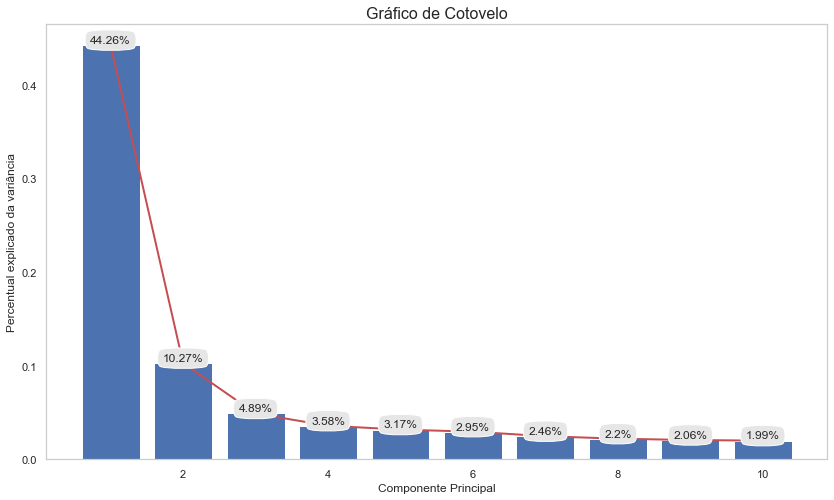

In [19]:
plt.figure(figsize=(14, 8))

valores_PC = np.arange(pca.n_components_) + 1

plt.bar(valores_PC, pca.explained_variance_ratio_)
plt.plot(valores_PC, pca.explained_variance_ratio_, 'ro-', linewidth=2)

for i, txt in enumerate(pca.explained_variance_ratio_):
    plt.annotate(f'{round((txt * 100), 2)}%', (valores_PC[i], 
                                         pca.explained_variance_ratio_[i]),
                ha='center', size=12, va="bottom",
                bbox=dict(boxstyle="round4, pad=.5", fc="0.9"))

plt.title('Gráfico de Cotovelo', fontsize = 16)
plt.xlabel('Componente Principal')
plt.ylabel('Percentual explicado da variância')
plt.grid(False)
plt.show()

In [20]:
# O scree plot ("Gráfico de Cotovelo") indica que os três primeiros componentes já explicam
# 59,42% da variabilidade dos dados. A partir da quarta componente a variância passa a ser
# < 4%, portanto ganha-se muito pouco adicionando novos componentes.

# Contribuição das Questões para os Componentes Principais (Drivers)

# Cargas (loadings)

In [21]:
# Agora que obtivemos os componentes principais (drivers), é necessário interpretá-los
# examinando a natureza das questões que mais contribuíram para cada um deles. Deve-se
# resumir os atributos abordados pelas questões de forma que seja possível atribuir
# à cada driver um único aspecto geral.

In [22]:
# Para cada driver , a contribuição percentual de cada questão é igual a 100 vezes o
# quadrado da carga correspondente dividido pela soma dos quadrados de todas as cargas.

In [23]:
pca_tr = PCA(n_components=3) # Utilizarei apenas três componentes principais

In [24]:
componentes_tr = pca_tr.fit_transform(df_pca)

In [25]:
df_cargas = marcas.drop(columns=['marca', 'total'])

In [26]:
cargas = pd.DataFrame(pca_tr.components_, columns = df_cargas.columns)
cargas

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,-0.194900,-0.059375,-0.173316,-0.190966,-0.173834,-0.192798,-0.117264,-0.195661,-0.182410,-0.194099,...,-0.199198,-0.152694,-0.196556,-0.187763,-0.199703,-0.180205,-0.103519,-0.202782,-0.222380,-0.217516
1,-0.045572,0.299368,-0.017053,-0.163453,-0.045500,0.222941,0.349046,-0.241115,0.280480,-0.176124,...,-0.078982,0.191701,-0.176090,-0.260629,0.206707,0.171609,0.317138,0.210114,-0.115418,0.061299
2,0.224758,0.216013,0.292114,0.152871,0.171643,-0.144994,0.042258,-0.052644,-0.043851,-0.265627,...,0.276158,-0.032679,-0.220320,-0.149037,-0.252574,-0.167139,-0.082467,-0.216645,-0.147424,-0.199805


In [27]:
# contribuições para driver 1
contr_driver1 = []

for c, coluna in enumerate(cargas.columns):
    contribuicao = (cargas.loc[0][c]**2) / (cargas.sum(axis=1)[0]**2)
    contr_driver1.append(contribuicao)

In [28]:
df_contribuicoes1 = pd.DataFrame(contr_driver1, columns=['contribuicao'])

In [29]:
driver1 = pd.concat([questoes, df_contribuicoes1], axis=1)

In [30]:
driver1.head() # questões que mais contribuíram para o primeiro driver

,numero,pergunta,contribuicao
0,Q1,Deixa as roupas mais brancas,0.001357
1,Q2,É adequada para roupas coloridas,0.000126
2,Q3,É a melhor para a remoção de manchas de gordura,0.001073
3,Q4,Desinfeta melhor,0.001303
4,Q5,É boa para limpar gordura,0.001080


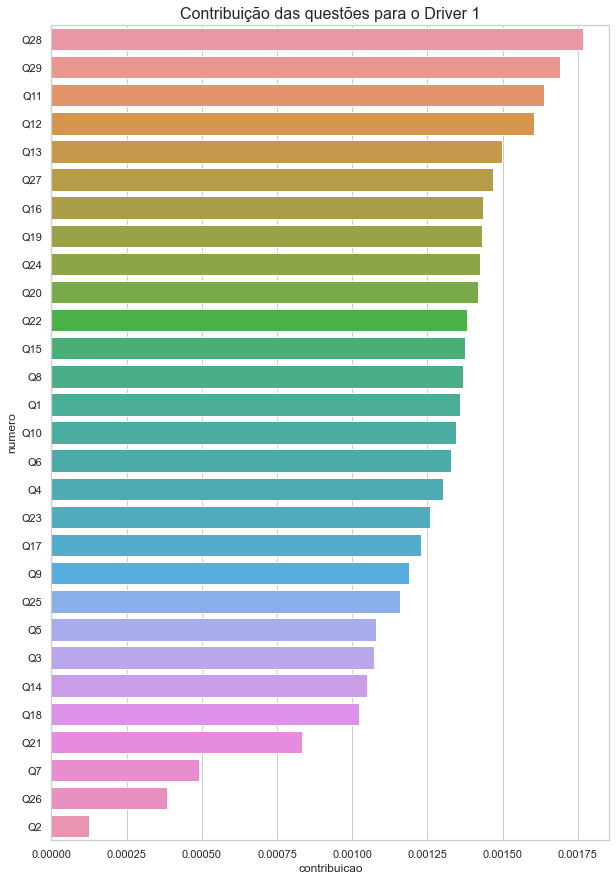

In [31]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y = 'numero', x='contribuicao', data=driver1,
            order = driver1.sort_values('contribuicao', ascending = False).numero);

plt.title('Contribuição das questões para o Driver 1', fontsize = 16);

In [32]:
driver1.sort_values('contribuicao', ascending = False)[:10]

,numero,pergunta,contribuicao
27,Q28,É eficiente na limpeza da casa toda,0.001767
28,Q29,Deixa a casa com aroma de limpeza,0.001690
10,Q11,Facilita a tarefa da dona de casa na limpeza d...,0.001638
11,Q12,Dá a melhor sensação de desinfecção,0.001604
12,Q13,É a mais adequada para a lavagem de roupas,0.001499
26,Q27,Deixa um aroma agradável nos lugares onde foi ...,0.001469
15,Q16,Rende mais,0.001435
18,Q19,É a melhor marca de alvejante do mercado,0.001432
23,Q24,Tem um aroma adequado para ser usada na casa toda,0.001425
19,Q20,É econômica no uso,0.001418


In [33]:
# Pelo teor dessas questões, pode-se dizer que o fator que mais explicou a variabilidade dos
# dados no Driver 1 é a capacidade de limpeza dos profutos avaliados.

## Driver 1: limpeza

In [34]:
# contribuições para driver 2
contr_driver2 = []

for c, coluna in enumerate(cargas.columns):
    contribuicao = (cargas.loc[1][c]**2) / (cargas.sum(axis=1)[1]**2) 
    contr_driver2.append(contribuicao)

In [35]:
df_contribuicoes2 = pd.DataFrame(contr_driver2, columns=['contribuicao'])

In [36]:
driver2 = pd.concat([questoes, df_contribuicoes2], axis=1)

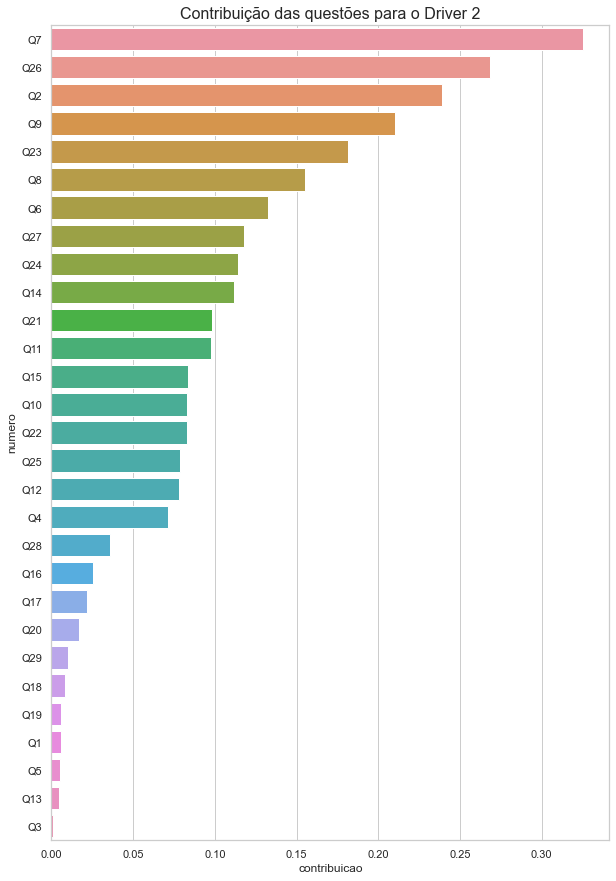

In [37]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y = 'numero', x='contribuicao', data=driver2,
            order = driver2.sort_values('contribuicao', ascending = False).numero);

plt.title('Contribuição das questões para o Driver 2', fontsize = 16);

In [38]:
driver2.sort_values('contribuicao', ascending = False)[:10]

,numero,pergunta,contribuicao
6,Q7,É suave para as mãos,0.325232
25,Q26,Não deixa um aroma forte e ruim nas mãos,0.268487
1,Q2,É adequada para roupas coloridas,0.239243
8,Q9,Deixa um aroma agradável nas roupas,0.210005
22,Q23,É eficiente para desinfetar vasos sanitários e...,0.181331
7,Q8,É adequada para a limpeza pesada,0.155195
5,Q6,Deixa um aroma agradável na casa,0.132681
26,Q27,Deixa um aroma agradável nos lugares onde foi ...,0.117852
23,Q24,Tem um aroma adequado para ser usada na casa toda,0.114061
13,Q14,É fácil de enxaguar,0.111777


## Driver 2: Suavidade

In [39]:
# contribuições para driver 3
contr_driver3 = []

for c, coluna in enumerate(cargas.columns):
    contribuicao = (cargas.loc[2][c]**2) / (cargas.sum(axis=1)[2]**2) 
    contr_driver3.append(contribuicao)

In [40]:
df_contribuicoes3 = pd.DataFrame(contr_driver3, columns=['contribuicao'])

In [41]:
driver3 = pd.concat([questoes, df_contribuicoes3], axis=1)

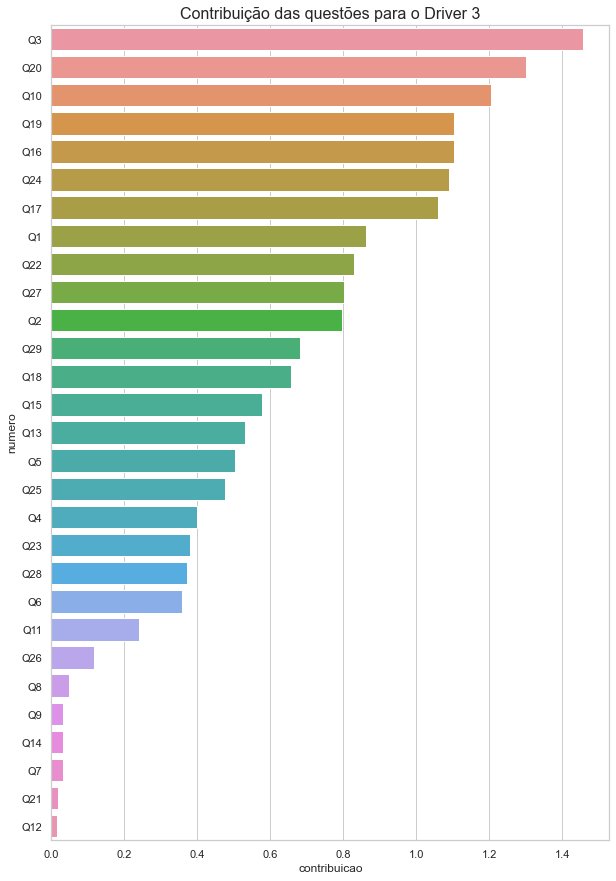

In [42]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y = 'numero', x='contribuicao', data=driver3,
            order = driver3.sort_values('contribuicao', ascending = False).numero);

plt.title('Contribuição das questões para o Driver 3', fontsize = 16);

In [43]:
driver3.sort_values('contribuicao', ascending = False)[:10]

,numero,pergunta,contribuicao
2,Q3,É a melhor para a remoção de manchas de gordura,1.457230
19,Q20,É econômica no uso,1.302383
9,Q10,É um produto para ser usado tanto na cozinha c...,1.204944
18,Q19,É a melhor marca de alvejante do mercado,1.104254
15,Q16,Rende mais,1.104067
23,Q24,Tem um aroma adequado para ser usada na casa toda,1.089434
16,Q17,Vale o preço que custa,1.059808
0,Q1,Deixa as roupas mais brancas,0.862683
21,Q22,É adequada tanto para a faxina como para a lim...,0.828956
26,Q27,Deixa um aroma agradável nos lugares onde foi ...,0.801530


## Driver 3: Intensidade

# Posicionamento de Marcas

In [44]:
# O posicionamento das marcas é determinado pelo valor médio destas sobre os drivers.

In [45]:
marcas_esc = marcas.drop(columns=['marca', 'total'])

In [46]:
marcas_esc = pd.DataFrame(scaler.fit_transform(marcas_esc), columns=marcas_esc.columns)

In [47]:
marcas_esc['marca'] = marcas['marca']

In [48]:
df_agreg = marcas_esc.groupby(['marca'], as_index = False).mean()

In [49]:
X_agregado = df_agreg.drop(columns = ['marca']) # média das pontuações para cada marca
y_agregado = df_agreg['marca']

In [50]:
X_agregado

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,0.454264,0.281017,0.275550,0.356762,0.329371,0.326344,0.311242,0.518869,0.189181,0.478348,...,0.386875,0.436663,0.356880,0.422272,0.337357,0.573965,0.387191,0.346819,0.520371,0.616274
1,0.524483,1.203413,0.660197,0.565645,0.597189,0.832502,1.048788,0.506092,0.915371,0.553332,...,0.456418,0.700349,0.584531,0.604582,0.899136,0.771568,1.017586,0.959698,0.721206,0.761017
2,-0.653858,-0.275747,-0.473237,-0.302848,-0.561238,-0.479175,-0.383936,-0.340497,-0.354801,-0.243098,...,-0.503845,-1.161010,-0.356659,-0.274107,-0.476811,-0.839027,-0.099476,-0.447089,-0.651625,-0.591379
3,-0.345159,-0.567733,-0.155958,-0.143398,-0.164393,-0.351713,-0.578206,-0.103456,-0.360659,-0.436124,...,-0.162692,-0.446449,-0.423465,-0.051586,-0.367246,-0.567621,-0.646153,-0.298470,-0.329757,-0.304645
4,0.440078,0.913403,0.287521,0.225356,0.325423,0.888870,1.079068,0.064327,0.913421,0.056510,...,0.181056,0.455103,0.032915,0.134414,0.683023,0.567771,0.495528,0.789067,0.243897,0.489184
5,0.200789,-0.235091,0.024190,0.257518,-0.229567,-0.051114,0.041408,0.162159,-0.011107,0.189598,...,0.108138,-0.032661,0.319935,0.219602,0.122616,0.081704,0.105939,0.085537,0.090710,0.180584
6,-0.237755,-0.280125,-0.247859,-0.278603,-0.299417,0.096922,0.295725,0.051130,0.045301,-0.205143,...,-0.051547,0.212663,-0.105656,-0.110890,0.212333,-0.014398,0.042520,0.015399,-0.100845,-0.207053
7,-0.263032,-0.417572,-0.342166,-0.222987,-0.238019,-0.173283,-0.447410,-0.223830,-0.386078,-0.228527,...,-0.171711,-0.311864,-0.196431,-0.112586,-0.307045,-0.463941,-0.563834,-0.285829,-0.418093,-0.352622
8,0.258380,-0.100322,0.133252,-0.021715,-0.039936,0.072996,0.053075,-0.046388,0.033238,-0.049078,...,0.051327,0.429471,-0.045329,-0.014210,0.124369,0.464073,-0.001470,0.151492,0.128468,0.089584
9,-0.170753,-0.427852,-0.116683,0.066134,-0.102580,-0.444692,-0.636894,0.039569,-0.477633,-0.141794,...,0.061715,-0.550650,-0.089667,0.101739,-0.496947,-0.530435,-0.594928,-0.424454,-0.065850,-0.192069


In [51]:
drivers_agregados = pca_tr.fit_transform(X_agregado, y_agregado)

In [52]:
df_drivers_agregados = pd.DataFrame(drivers_agregados, columns = ['Limpeza', 'Suavidade', 'Intensidade'])

In [53]:
df_drivers_agregados = df_drivers_agregados.join(y_agregado)

In [54]:
df_drivers_agregados

,Limpeza,Suavidade,Intensidade,marca
0,1.764801,-1.003902,0.045282,Abrax
1,3.581169,-0.316121,-0.112016,AbraxF
2,-2.764151,0.364578,-0.111328,Akran
3,-2.010518,-0.180454,0.472607,Alvex
4,2.269511,0.568489,-0.135043,Beach
5,0.253937,-0.793003,0.202750,CanX
6,-0.613467,0.160335,-0.482859,Candu
7,-1.831286,-0.093709,0.259228,Clari
8,0.266573,-0.164361,0.113136,Clorex
9,-1.722611,-0.704240,0.647406,Cloro


In [55]:
df_para_grafico = df_drivers_agregados.T
df_para_grafico.columns = df_para_grafico.iloc[3]
df_para_grafico.drop(df_para_grafico.index[3], inplace = True)

In [56]:
df_para_grafico

marca,Abrax,AbraxF,Akran,Alvex,Beach,CanX,Candu,Clari,Clorex,Cloro,Dragon,Mundo,Qbom,RiUS,RiUtil,Same,Tubex,XPerf,XSP
Limpeza,1.764801,3.581169,-2.764151,-2.010518,2.269511,0.253937,-0.613467,-1.831286,0.266573,-1.722611,-1.257461,-2.146368,-0.715888,1.61002,1.852063,-1.251294,-0.931093,2.385051,1.261012
Suavidade,-1.003902,-0.316121,0.364578,-0.180454,0.568489,-0.793003,0.160335,-0.093709,-0.164361,-0.70424,0.249122,0.598694,-0.897764,-0.037478,2.717266,0.439289,0.267588,-0.462289,-0.71204
Intensidade,0.045282,-0.112016,-0.111328,0.472607,-0.135043,0.20275,-0.482859,0.259228,0.113136,0.647406,-0.454239,-0.29549,0.459511,0.02198,0.696978,-0.375743,-0.666866,-0.401902,0.116609


In [57]:
n_drivers = [j for j in enumerate(df_para_grafico.columns)]

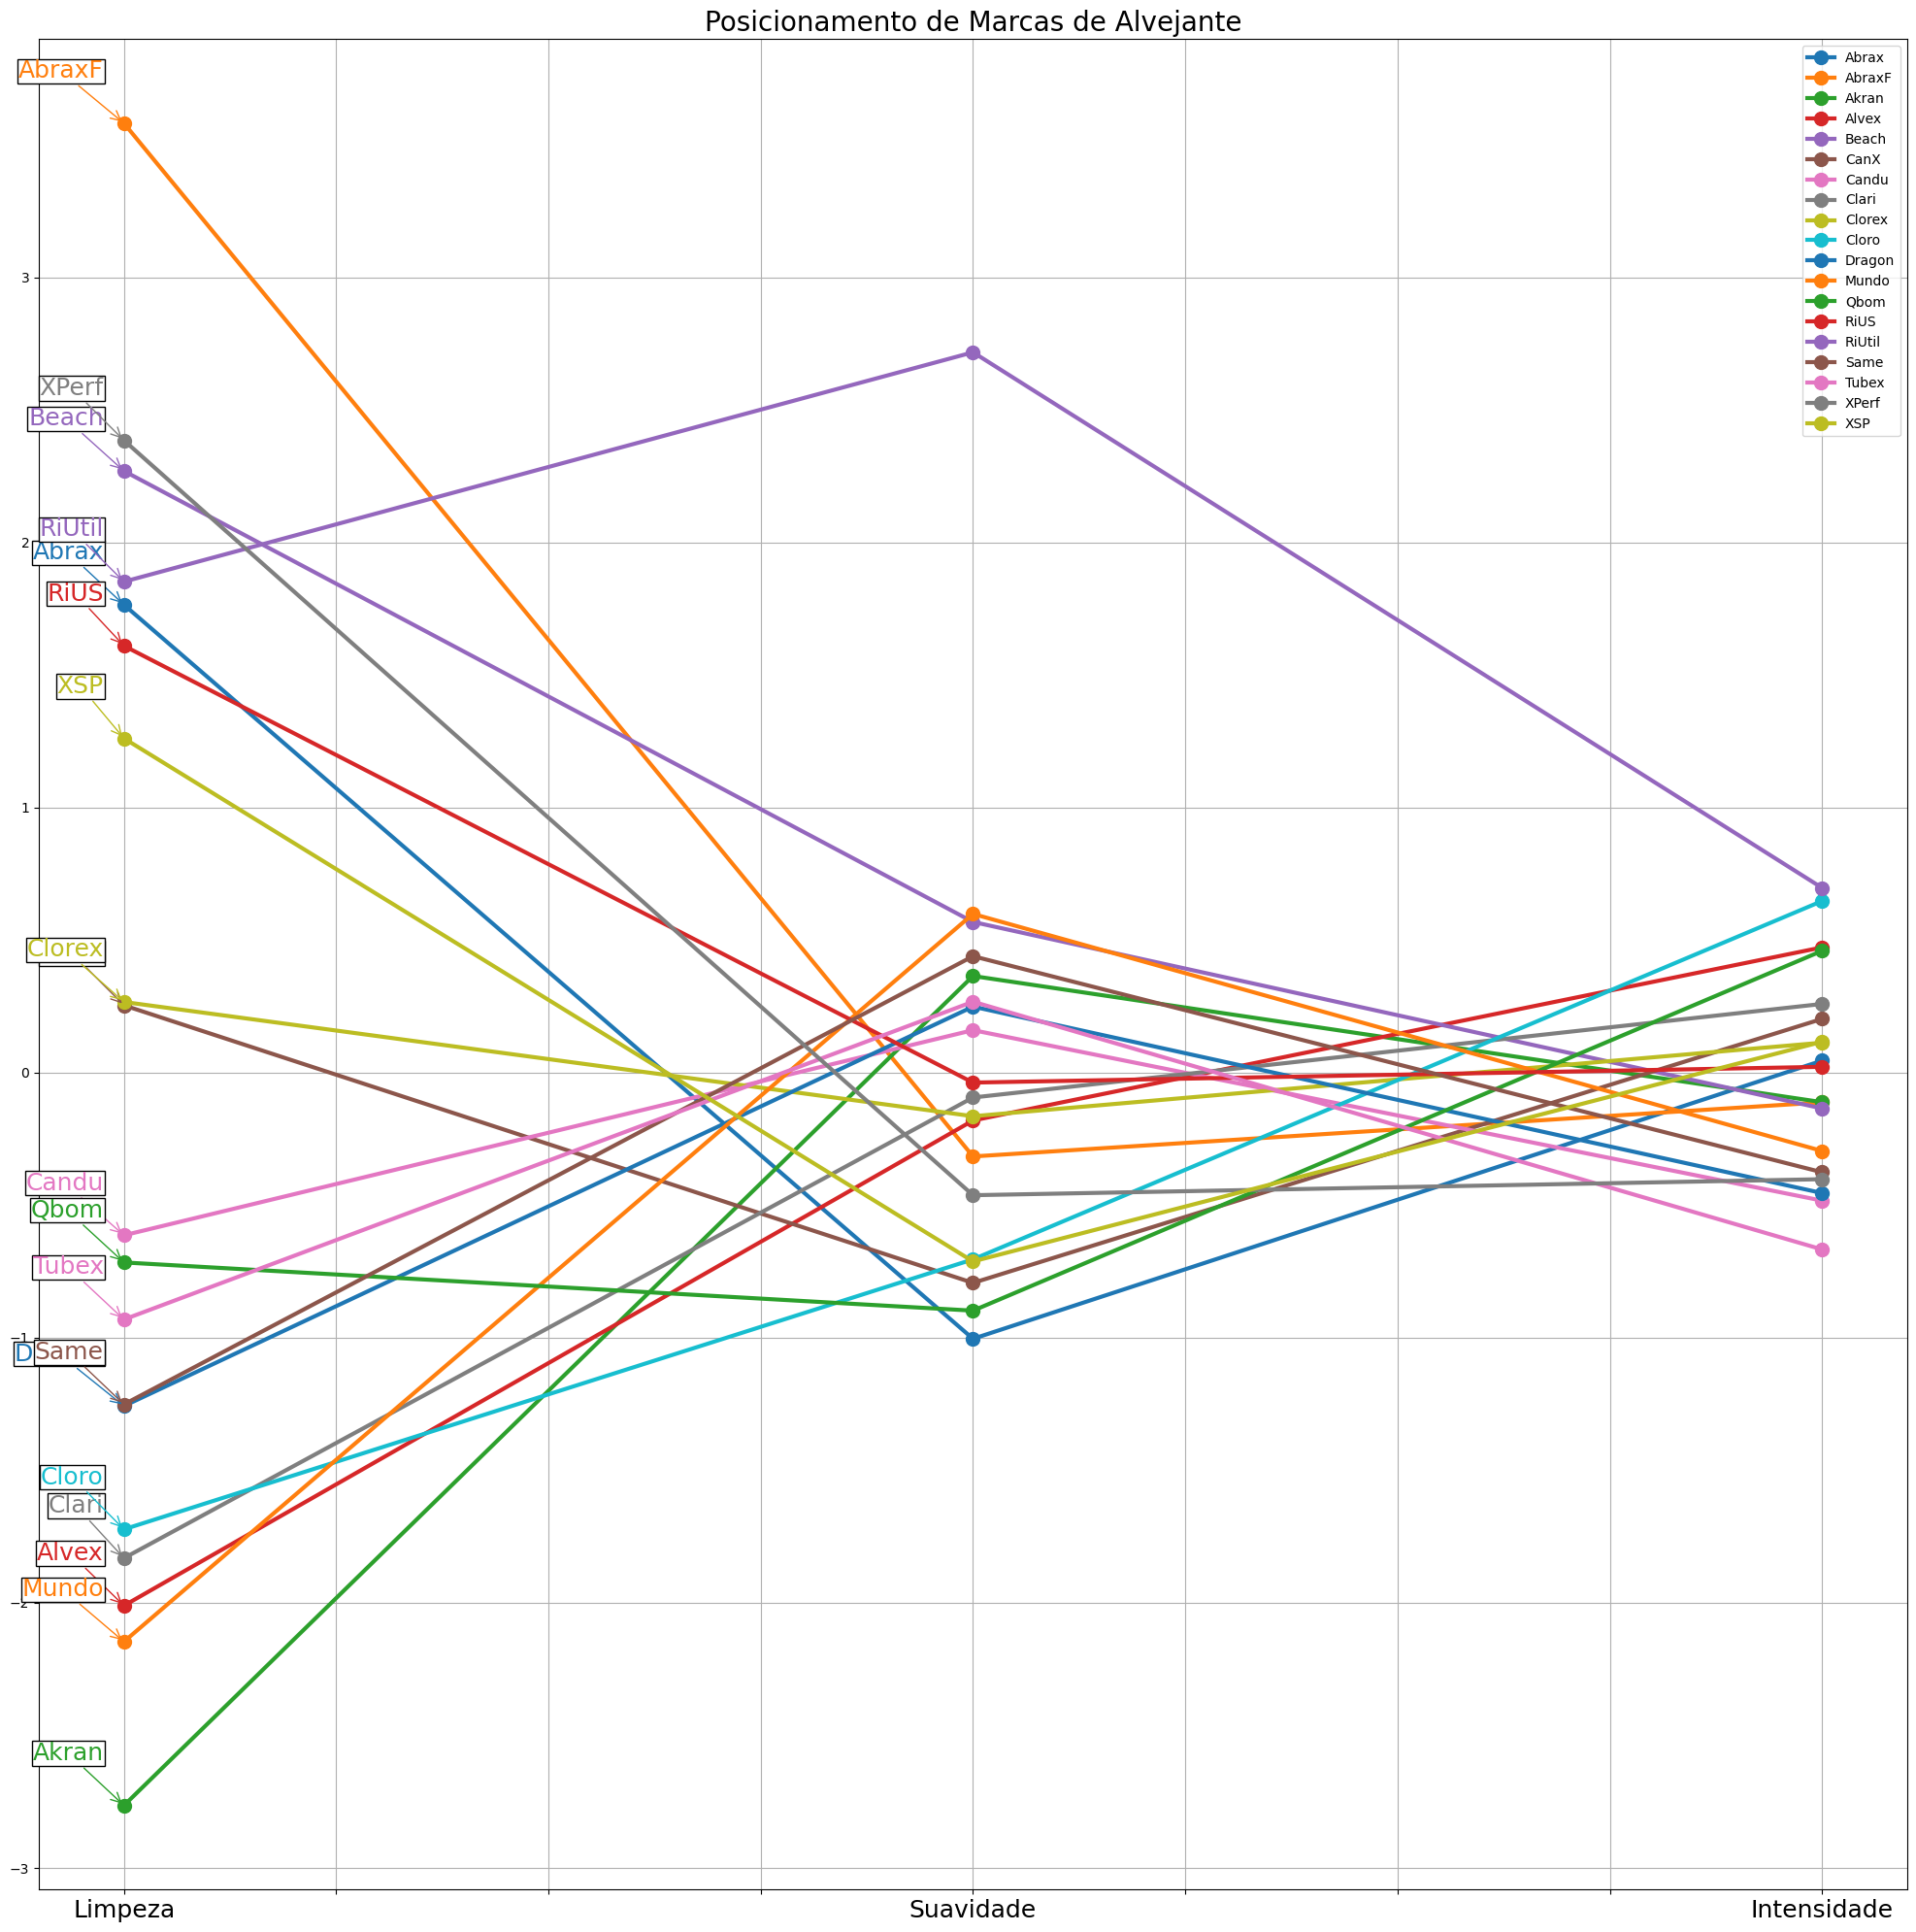

In [99]:
# sns.set(style = 'whitegrid')
plt.style.use('default')
f, ax = plt.subplots(figsize=(20, 20))

df_para_grafico.plot(marker = 'o', markersize = 10, linewidth=3, legend=False, ax = ax) 

leg = ax.legend()

cores = []

for linha, texto in zip(leg.get_lines(), leg.get_texts()):
    cor = (linha.get_color())
    cores.append(cor)

for i, txt in enumerate(df_para_grafico.columns):
    ax.annotate(txt, (0,
                df_para_grafico.loc['Limpeza'][i]), 
                ha='right', size=18, va="bottom", color=cores[i],
                bbox=dict(pad=.5, fc="0.9"),
                xytext=(-15, 30),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=cores[i],
                                connectionstyle="arc3"))

ax.tick_params(axis='x', labelsize=18)
plt.grid(True)
plt.title('Posicionamento de Marcas de Alvejante', fontsize=20)
plt.tight_layout()
plt.savefig('posicionamento_de_marcas.png')

In [ ]:
# Observa-se nesse gráfico que a marca AbraxF é a mais bem posicionada no quesito "Limopeza",
# enquanto a marca Akran é a pior posicionada. A marca RiUtil é a mais bem posicionada em
# "Suavidade" e "Intensidade".